In [5]:
from fuzzy_sql.fuzzy_sql import *
import os  

In [6]:
#set paths
root_dir=Path(os.getcwd()).parent
real_dir=os.path.join(root_dir,'data/tabular/real')
meta_dir=os.path.join(root_dir,'data/tabular/metadata')
syn_dir=os.path.join(root_dir,'data/tabular/synthetic')



In [7]:
#extract real data names and define paths
ds_names=extract_fnames(real_dir)

# drop trail 5 since there is no synth data for it
ds_names.remove('trial5')

real_path=[]
meta_path=[]
syn_path=[]
for ds_name in ds_names:
    real_path.append(real_dir+f'/{ds_name}.csv')
    meta_path.append(meta_dir+f'/{ds_name}.json')
    syn_path.append(syn_dir+f'/{ds_name}_syn_06.csv')


   



Extracted the names of 41 real datasets


Table C20 already exists in the database
Table C20_syn_06 already exists in the database
Generated Conditioned Aggregate Query 0 
Generated Conditioned Aggregate Query 1 
Generated Conditioned Aggregate Query 2 
Generated Conditioned Aggregate Query 3 
Generated Conditioned Aggregate Query 4 
Generated Conditioned Aggregate Query 5 
Generated Conditioned Aggregate Query 6 
Generated Conditioned Aggregate Query 7 
Generated Conditioned Aggregate Query 8 
Generated Conditioned Aggregate Query 9 
Generated Conditioned Aggregate Query 10 
Generated Conditioned Aggregate Query 11 
Generated Conditioned Aggregate Query 12 
Generated Conditioned Aggregate Query 13 
Generated Conditioned Aggregate Query 14 
Generated Conditioned Aggregate Query 15 
Generated Conditioned Aggregate Query 16 
Generated Conditioned Aggregate Query 17 
Generated Conditioned Aggregate Query 18 
Generated Conditioned Aggregate Query 19 
Generated Conditioned Aggregate Query 20 
Generated Conditioned Aggregate Query 2

TypeError: can only concatenate str (not "numpy.int64") to str

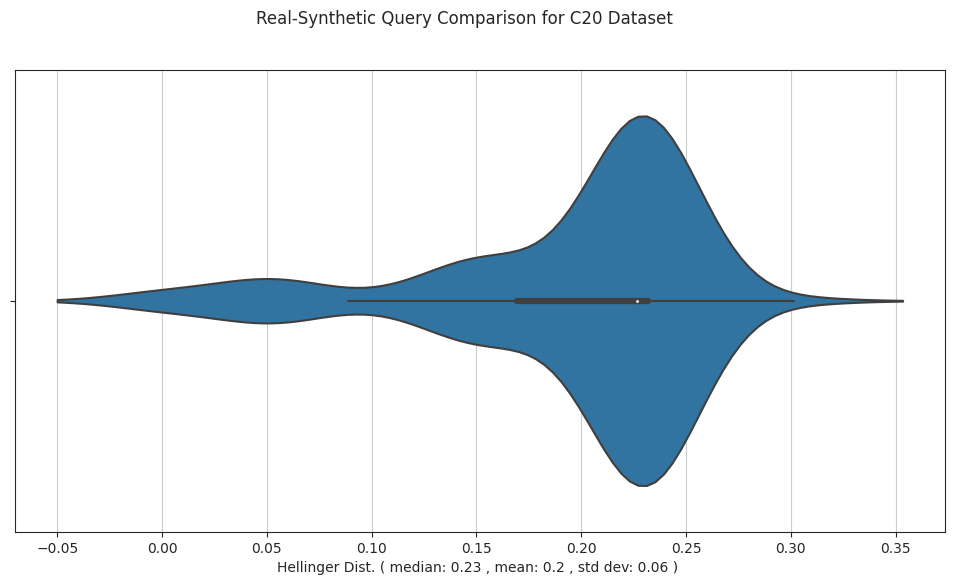

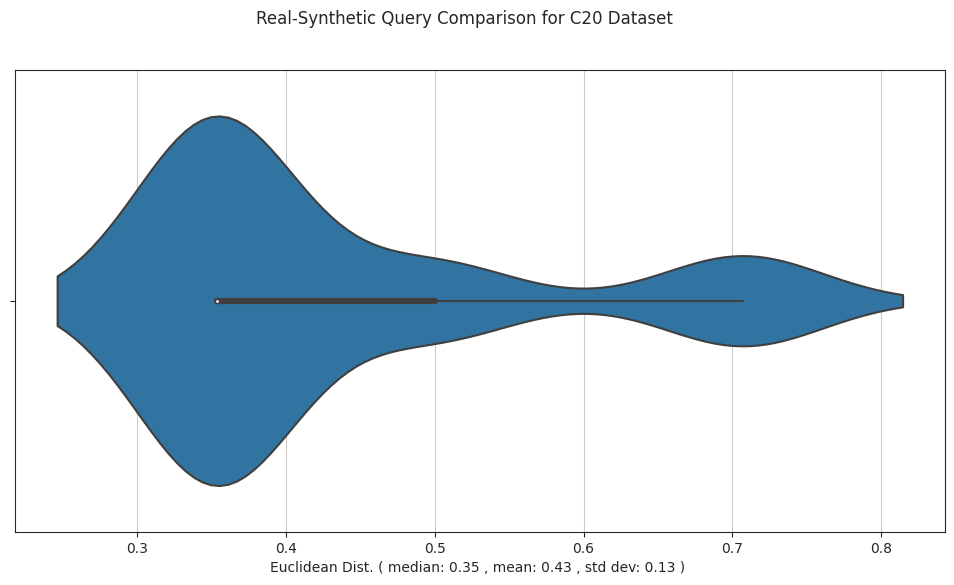

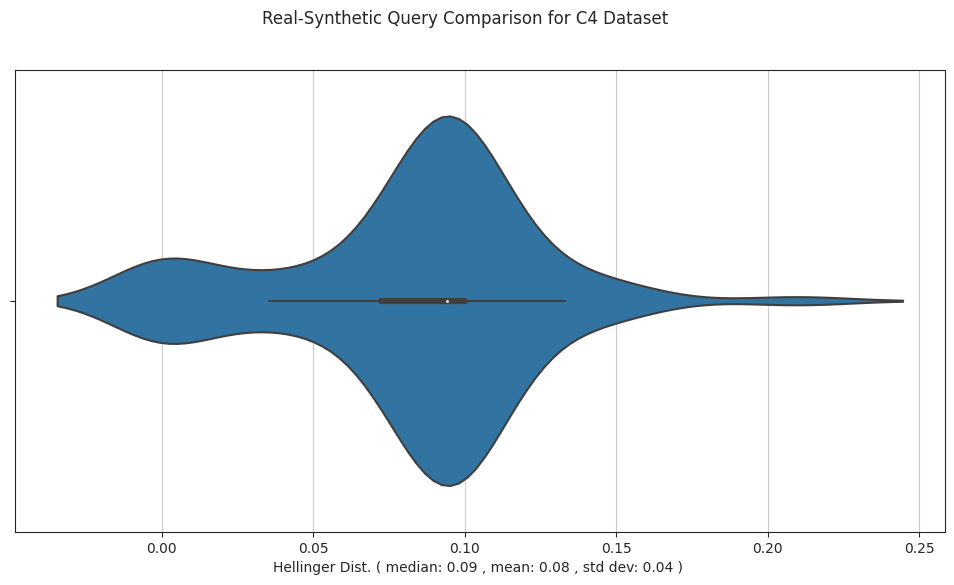

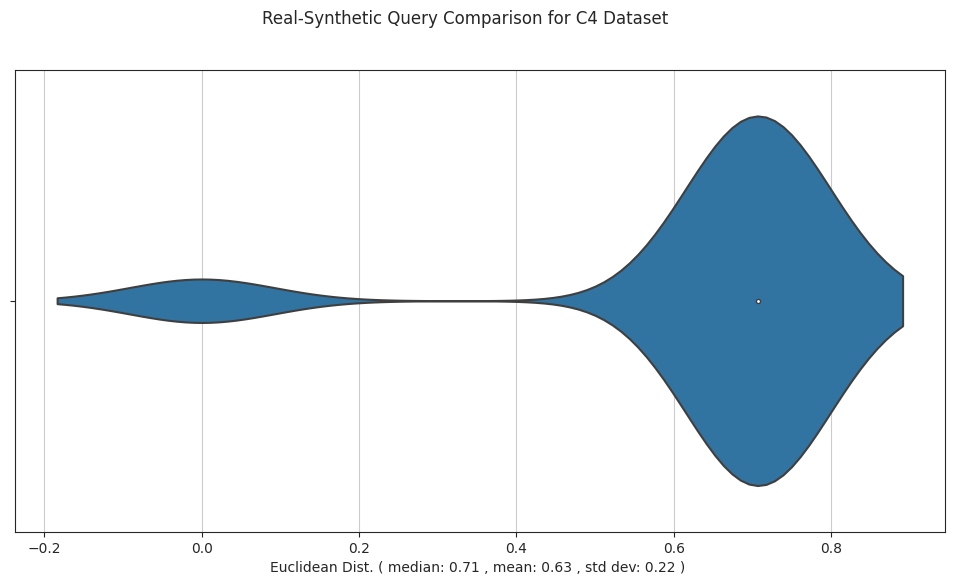

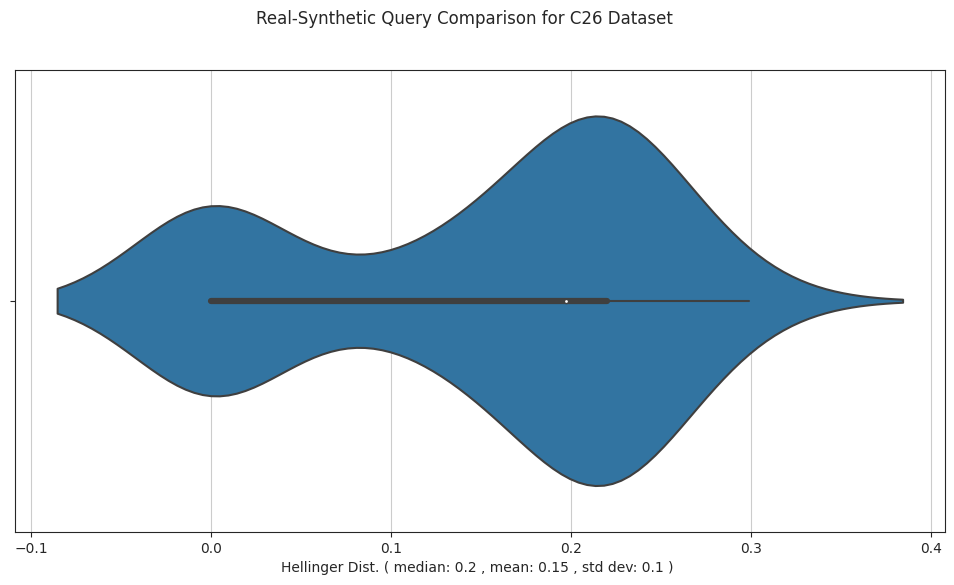

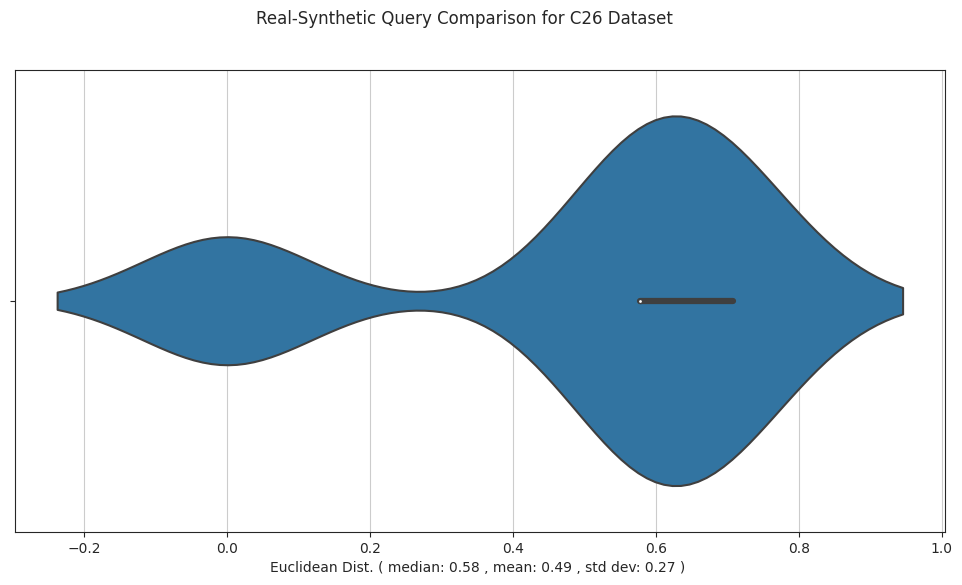

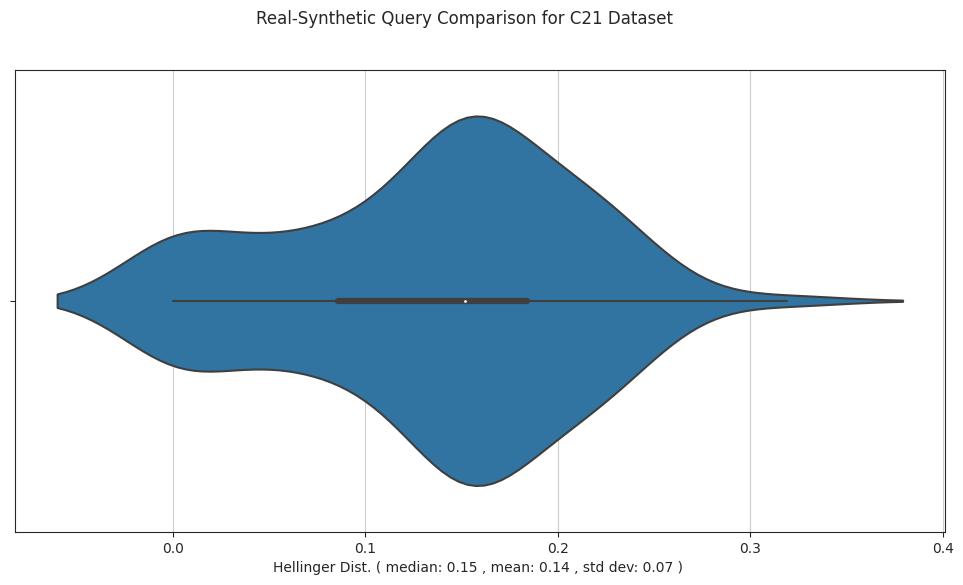

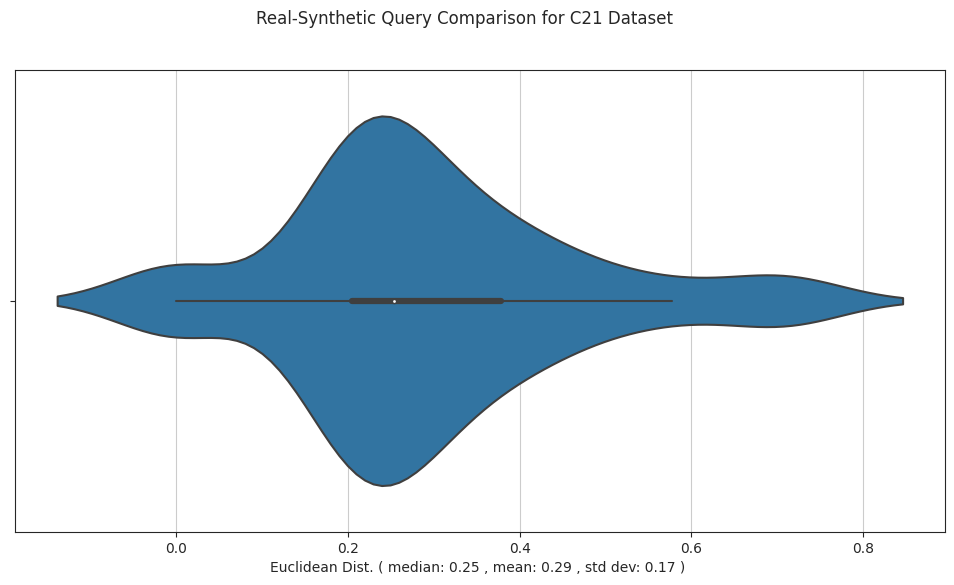

In [12]:
# Fuzz
res={'name':[], 'hlngr_mean':[], 'hlngr_median':[], 'hlngr_std_dev':[], 'ecldn_mean':[], 'ecldn_median':[], 'ecldn_std_dev':[] }
for i,ds_name in enumerate(ds_names):
    scored_queries=fuzz_tabular(100,'twin_aggfltr', real_path[i], meta_path[i],syn_path[i])
    res['name'].append(ds_name)
    hlngr_stats=calc_stats(scored_queries['hlngr_dist'])
    res['hlngr_mean'].append(hlngr_stats['mean'])
    res['hlngr_median'].append(hlngr_stats['median'])
    res['hlngr_std_dev'].append(hlngr_stats['stddev'])
    ecldn_stats=calc_stats(scored_queries['ecldn_dist'])
    res['ecldn_mean'].append(hlngr_stats['mean'])
    res['ecldn_median'].append(hlngr_stats['median'])
    res['ecldn_std_dev'].append(hlngr_stats['stddev'])
